<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500000 entries, 2010-01-01 to 2017-07-28
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          500000 non-null  object 
 1   Country         500000 non-null  object 
 2   Item Type       500000 non-null  object 
 3   Sales Channel   500000 non-null  object 
 4   Order Priority  500000 non-null  object 
 5   Order ID        500000 non-null  int64  
 6   Ship Date       500000 non-null  object 
 7   Units Sold      500000 non-null  int64  
 8   Unit Price      500000 non-null  float64
 9   Unit Cost       500000 non-null  float64
 10  Total Revenue   500000 non-null  float64
 11  Total Cost      500000 non-null  float64
 12  Total Profit    500000 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 53.4+ MB
None
                                       Region      Country   Item Type  \
Order Date                               

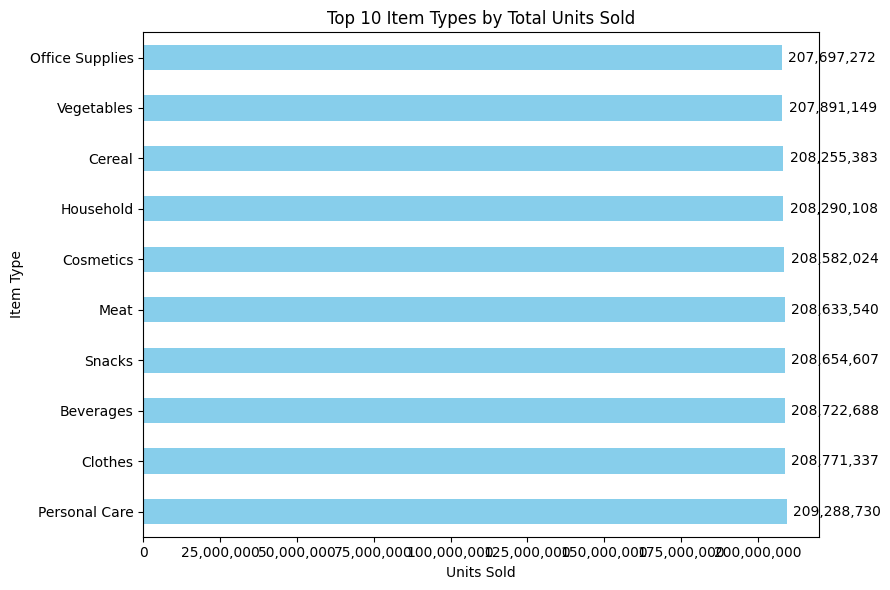

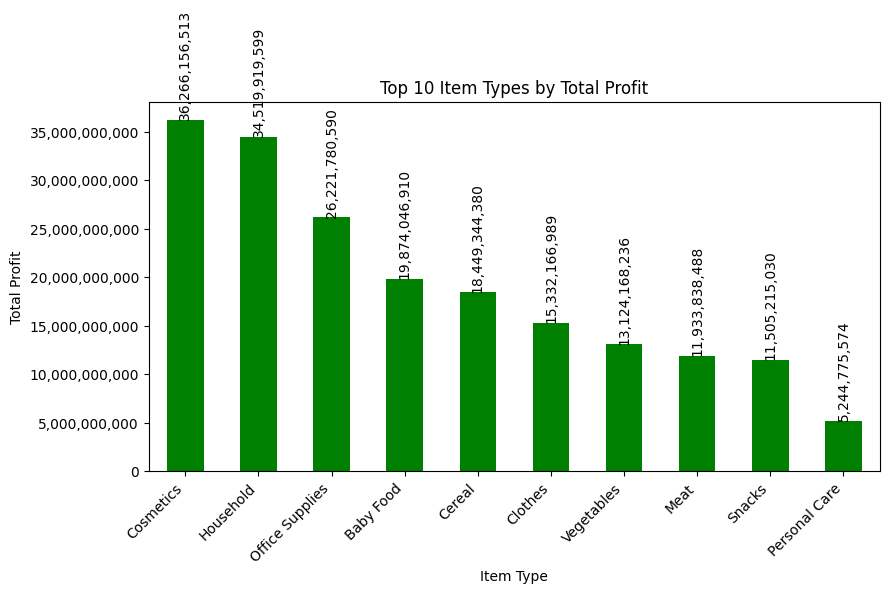

<ipython-input-7-17f3f3fd5d68>:87: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum(numeric_only=True)


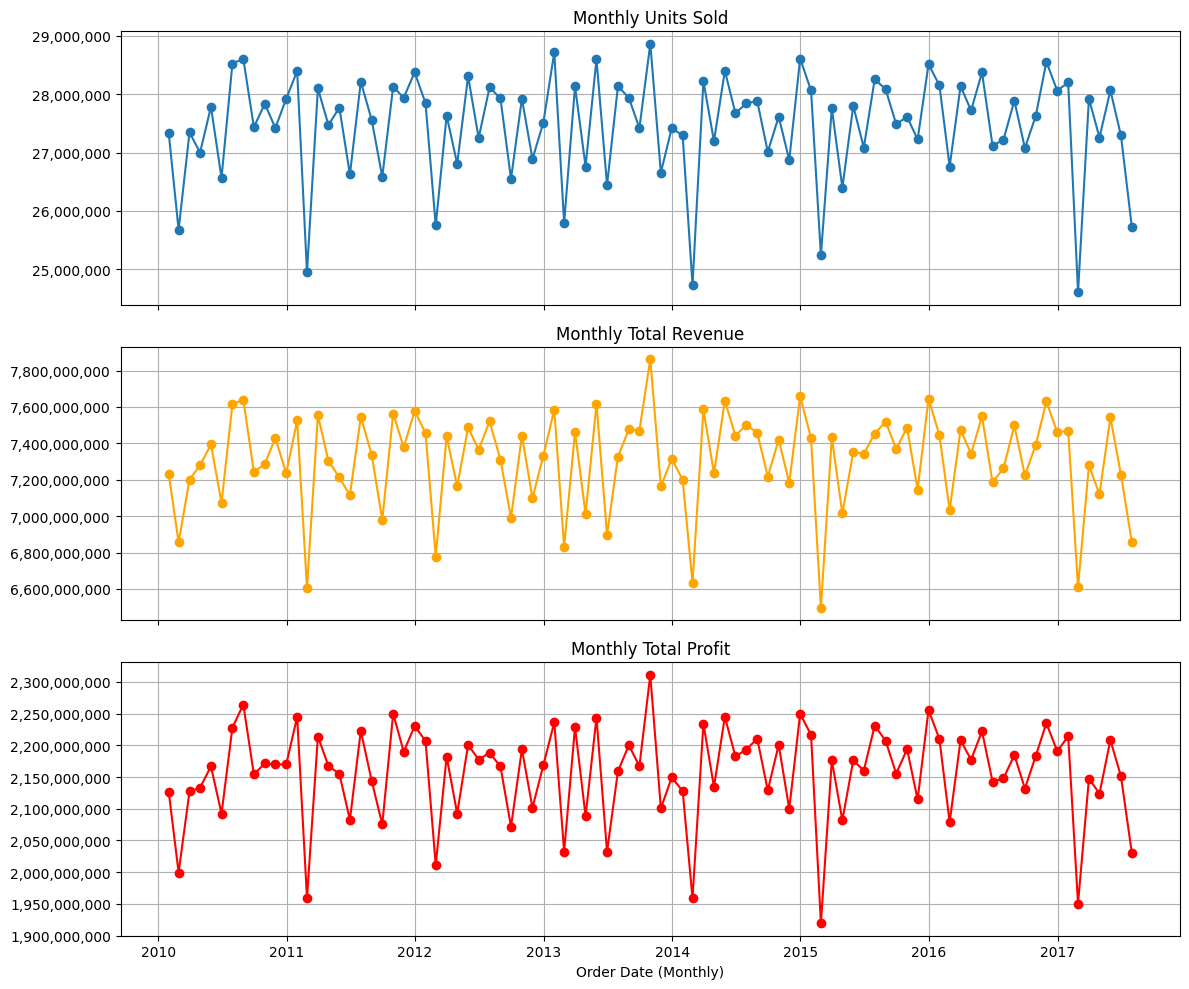

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# ----- 1. Load and Clean the Data -----

df = pd.read_csv("arima_sales.csv")

# Convert 'Order Date' to datetime, sort, and set as index
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.sort_values('Order Date', inplace=True)
df.set_index('Order Date', inplace=True)

print(df.info())
print(df.head())

# ----- 2. Top 10 Item Types by Total Units Sold (Horizontal Bar) -----

# Group by item type and sum units sold
top_units = (
    df.groupby("Item Type")['Units Sold']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(9, 6))
top_units.plot(kind='barh', color='skyblue', ax=ax)

ax.set_title("Top 10 Item Types by Total Units Sold")
ax.set_xlabel("Units Sold")
ax.set_ylabel("Item Type")

# Format the x-axis to avoid scientific notation
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Annotate bars with numeric values
for patch in ax.patches:
    value = patch.get_width()
    ax.annotate(
        f'{value:,.0f}',  # comma formatting
        (value + (0.01 * value), patch.get_y() + 0.5 * patch.get_height()),
        va='center'
    )

plt.tight_layout()
plt.show()

# ----- 3. Top 10 Item Types by Total Profit (Vertical Bar) -----

top_profit = (
    df.groupby("Item Type")['Total Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

fig, ax = plt.subplots(figsize=(9, 6))
top_profit.plot(kind='bar', color='green', ax=ax)

ax.set_title("Top 10 Item Types by Total Profit")
ax.set_xlabel("Item Type")
ax.set_ylabel("Total Profit")

# Format the y-axis
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Annotate bars with numeric values
for patch in ax.patches:
    height = patch.get_height()
    ax.annotate(
        f'{height:,.0f}',
        (patch.get_x() + patch.get_width() / 2, height),
        ha='center',
        va='bottom',
        rotation=90
    )

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ----- 4. Monthly Time Series (Units Sold, Total Revenue, Total Profit) -----

# Resample monthly and sum
df_monthly = df.resample('M').sum(numeric_only=True)

fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# a) Monthly Units Sold
axs[0].plot(df_monthly.index, df_monthly['Units Sold'], marker='o', linestyle='-')
axs[0].set_title("Monthly Units Sold")
axs[0].yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# b) Monthly Total Revenue
axs[1].plot(df_monthly.index, df_monthly['Total Revenue'], color='orange', marker='o', linestyle='-')
axs[1].set_title("Monthly Total Revenue")
axs[1].yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# c) Monthly Total Profit
axs[2].plot(df_monthly.index, df_monthly['Total Profit'], color='red', marker='o', linestyle='-')
axs[2].set_title("Monthly Total Profit")
axs[2].yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

for ax in axs:
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.grid(True)

axs[2].set_xlabel("Order Date (Monthly)")

plt.tight_layout()
plt.show()

